In [23]:
import pandas as pd
df = pd.read_csv('online_requests.csv')
df

,Unnamed: 0,Request Creation Date,Request Creation Time,Number of Passengers,Booking Type,Requested Pickup Time,Origin Lat,Origin Lng,Destination Lat,Destination Lng,Request Status,On-demand ETA,Ride Duration,Origin Node,Destination Node
0,0,2023-01-03,2023-01-03 19:12:16,1,On Demand,2023-01-03 19:14:15,42.371232,-71.121891,42.362511,-71.113059,Unaccepted Proposal,3.5,NaN,61325617,61317400
1,1,2023-01-03,2023-01-03 19:13:37,1,On Demand,2023-01-03 19:15:36,42.377445,-71.116613,42.370020,-71.110136,Unaccepted Proposal,6.5,NaN,61329142,61326730
2,2,2023-01-03,2023-01-03 19:18:56,1,On Demand,2023-01-03 19:20:55,42.371281,-71.122334,42.385452,-71.115491,Completed,4.7,7.9,61325617,61170738
3,3,2023-01-03,2023-01-03 19:24:59,1,On Demand,2023-01-03 19:26:57,42.375568,-71.128022,42.381676,-71.114599,Completed,3.8,7.6,61324786,2562486744
4,4,2023-01-03,2023-01-03 19:50:56,1,On Demand,2023-01-03 19:52:55,42.366306,-71.115005,42.371367,-71.116546,Unaccepted Proposal,7.4,NaN,61328439,61325523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33786,43056,2022-12-22,2022-12-22 22:32:00,1,On Demand,2022-12-22 22:34:00,42.376273,-71.115999,42.368864,-71.115214,Completed,3.2,8.6,61329142,61321522
33787,43057,2022-12-22,2022-12-22 22:39:00,1,On Demand,2022-12-22 22:41:00,42.379677,-71.125679,42.386852,-71.130425,Unaccepted Proposal,7.5,NaN,61329446,61330709
33788,43058,2022-12-22,2022-12-22 22:53:00,1,On Demand,2022-12-22 22:55:00,42.379052,-71.123896,42.383926,-71.112578,Completed,7.8,5.9,61324107,71951245
33789,43059,2022-12-22,2022-12-22 23:09:00,1,On Demand,2022-12-22 23:11:00,42.375487,-71.113144,42.376736,-71.104893,Completed,4.5,0.2,61324740,61171170


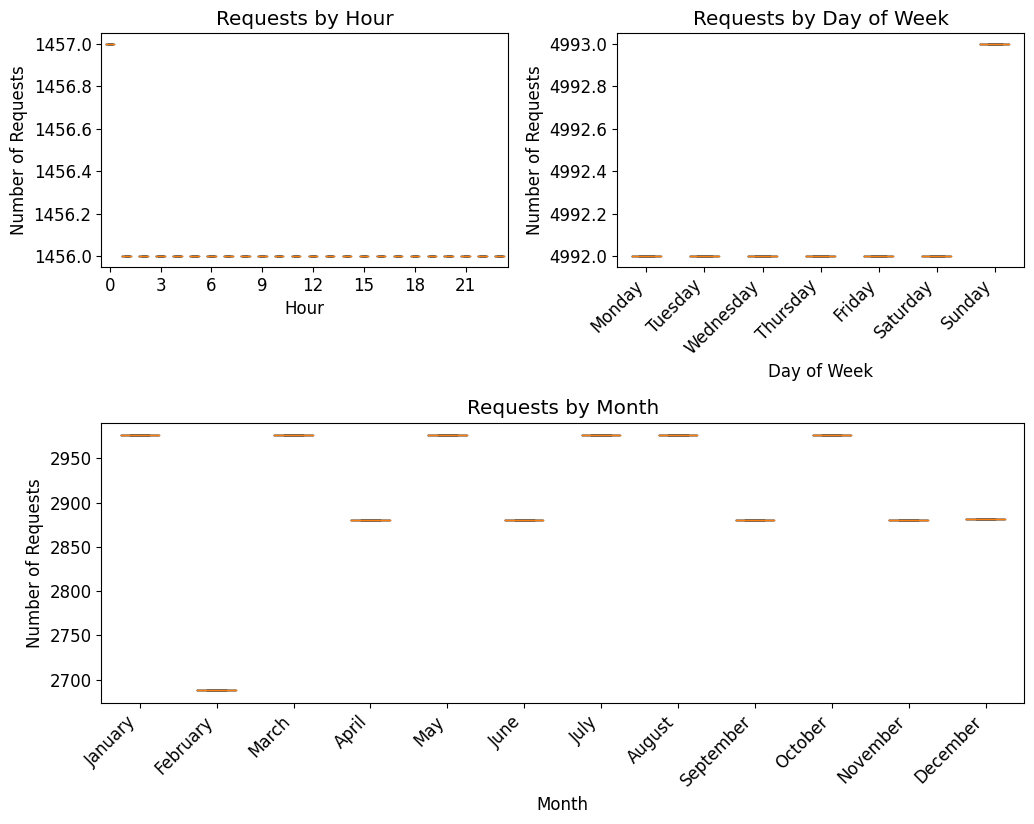

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Set the font size
plt.rcParams.update({'font.size': 12})

# Read the CSV file
# Note: You need to specify the path to your CSV file
# df = pd.read_csv('your_file_path.csv')

# For demonstration purposes, let's create some sample data
dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='15T')
df = pd.DataFrame({'Requested Pickup Time': dates})

# Convert 'Requested Pickup Time' to datetime
df['Requested Pickup Time'] = pd.to_datetime(df['Requested Pickup Time'])

# Extract hour, day of week, and month
df['Hour'] = df['Requested Pickup Time'].dt.hour
df['Day of Week'] = df['Requested Pickup Time'].dt.day_name()
df['Month'] = df['Requested Pickup Time'].dt.month_name()

# Calculate the width of the graphic (0.5 * A4 width in inches)
a4_width_inches = 21  # A4 width in inches
graphic_width = 0.5 * a4_width_inches

# Create figure with subplots (2 on top, 1 on bottom)
fig = plt.figure(figsize=(graphic_width, graphic_width * 0.8))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.2])

ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, :])

# Requests by Hour
hour_data = df.groupby('Hour').size().reset_index(name='Count')
ax1.boxplot([hour_data[hour_data['Hour'] == hour]['Count'] for hour in range(24)])
ax1.set_title('Requests by Hour')
ax1.set_xlabel('Hour')
ax1.set_ylabel('Number of Requests')
ax1.set_xticks(range(1, 25, 3))
ax1.set_xticklabels(range(0, 24, 3))

# Requests by Day of Week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_data = df.groupby('Day of Week').size().reset_index(name='Count')
ax2.boxplot([day_data[day_data['Day of Week'] == day]['Count'] for day in day_order])
ax2.set_title('Requests by Day of Week')
ax2.set_xlabel('Day of Week')
ax2.set_ylabel('Number of Requests')
ax2.set_xticklabels(day_order, rotation=45, ha='right')

# Requests by Month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_data = df.groupby('Month').size().reset_index(name='Count')
ax3.boxplot([month_data[month_data['Month'] == month]['Count'] for month in month_order])
ax3.set_title('Requests by Month')
ax3.set_xlabel('Month')
ax3.set_ylabel('Number of Requests')
ax3.set_xticklabels(month_order, rotation=45, ha='right')

# Adjust layout and display
plt.tight_layout()
plt.savefig('final_results/requests_frequency_boxplots.png', dpi=300, bbox_inches='tight')
plt.show()

In [25]:
df['5 Min Interval'] = df['Requested Pickup Time'].dt.floor('5T')
df

,Unnamed: 0,Request Creation Date,Request Creation Time,Number of Passengers,Booking Type,Requested Pickup Time,Origin Lat,Origin Lng,Destination Lat,Destination Lng,Request Status,On-demand ETA,Ride Duration,Origin Node,Destination Node,Hour,Day of Week,Month,5 Min Interval
0,0,2023-01-03,2023-01-03 19:12:16,1,On Demand,2023-01-03 19:14:15,42.371232,-71.121891,42.362511,-71.113059,Unaccepted Proposal,3.5,NaN,61325617,61317400,19,Tuesday,January,2023-01-03 19:10:00
1,1,2023-01-03,2023-01-03 19:13:37,1,On Demand,2023-01-03 19:15:36,42.377445,-71.116613,42.370020,-71.110136,Unaccepted Proposal,6.5,NaN,61329142,61326730,19,Tuesday,January,2023-01-03 19:15:00
2,2,2023-01-03,2023-01-03 19:18:56,1,On Demand,2023-01-03 19:20:55,42.371281,-71.122334,42.385452,-71.115491,Completed,4.7,7.9,61325617,61170738,19,Tuesday,January,2023-01-03 19:20:00
3,3,2023-01-03,2023-01-03 19:24:59,1,On Demand,2023-01-03 19:26:57,42.375568,-71.128022,42.381676,-71.114599,Completed,3.8,7.6,61324786,2562486744,19,Tuesday,January,2023-01-03 19:25:00
4,4,2023-01-03,2023-01-03 19:50:56,1,On Demand,2023-01-03 19:52:55,42.366306,-71.115005,42.371367,-71.116546,Unaccepted Proposal,7.4,NaN,61328439,61325523,19,Tuesday,January,2023-01-03 19:50:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33786,43056,2022-12-22,2022-12-22 22:32:00,1,On Demand,2022-12-22 22:34:00,42.376273,-71.115999,42.368864,-71.115214,Completed,3.2,8.6,61329142,61321522,22,Thursday,December,2022-12-22 22:30:00
33787,43057,2022-12-22,2022-12-22 22:39:00,1,On Demand,2022-12-22 22:41:00,42.379677,-71.125679,42.386852,-71.130425,Unaccepted Proposal,7.5,NaN,61329446,61330709,22,Thursday,December,2022-12-22 22:40:00
33788,43058,2022-12-22,2022-12-22 22:53:00,1,On Demand,2022-12-22 22:55:00,42.379052,-71.123896,42.383926,-71.112578,Completed,7.8,5.9,61324107,71951245,22,Thursday,December,2022-12-22 22:55:00
33789,43059,2022-12-22,2022-12-22 23:09:00,1,On Demand,2022-12-22 23:11:00,42.375487,-71.113144,42.376736,-71.104893,Completed,4.5,0.2,61324740,61171170,23,Thursday,December,2022-12-22 23:10:00


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is already defined and 'Requested Pickup Time' is in datetime format

# Round 'Requested Pickup Time' to the nearest 5 minutes
df['5 Min Interval'] = df['Requested Pickup Time'].dt.floor('5T')

# Group by '5 Min Interval' and count the occurrences
interval_counts = df['5 Min Interval'].value_counts().sort_index()

interval_counts

2022-05-29 04:40:00    1
2022-05-29 19:00:00    2
2022-05-29 19:05:00    3
2022-05-29 19:10:00    3
2022-05-29 19:15:00    3
                      ..
2023-03-01 23:25:00    2
2023-03-01 23:30:00    3
2023-03-01 23:35:00    2
2023-03-01 23:50:00    2
2023-03-01 23:55:00    3
Name: 5 Min Interval, Length: 14793, dtype: int64

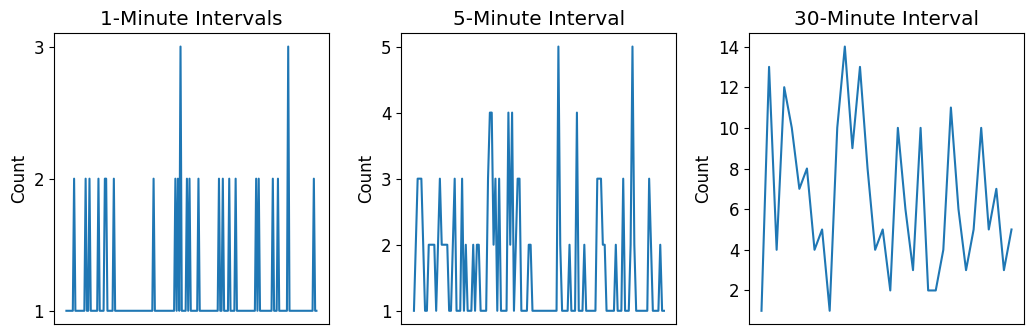

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Assuming df is already defined and 'Requested Pickup Time' is in datetime format

# Round 'Requested Pickup Time' to the nearest 1, 5, and 30 minutes
df['1 Min Interval'] = df['Requested Pickup Time'].dt.floor('1T')
df['5 Min Interval'] = df['Requested Pickup Time'].dt.floor('5T')
df['30 Min Interval'] = df['Requested Pickup Time'].dt.floor('30T')

# Filter the DataFrame to include only the first 5 days
start_date = df['Requested Pickup Time'].min().normalize()
end_date = start_date + pd.Timedelta(days=5)
filtered_df = df[(df['Requested Pickup Time'] >= start_date) & (df['Requested Pickup Time'] < end_date)]

# Group by intervals and count the occurrences for the first 5 days
interval_counts_1min = filtered_df['1 Min Interval'].value_counts().sort_index()
interval_counts_5min = filtered_df['5 Min Interval'].value_counts().sort_index()
interval_counts_30min = filtered_df['30 Min Interval'].value_counts().sort_index()

# Set the font size to 12 for all elements
plt.rcParams.update({'font.size': 12})

# Create a figure with three subplots side by side
# A4 width is 210mm, so half of that is 105mm (10.5cm)
fig_width_cm = 10.5
fig_height_cm = fig_width_cm / 3  # Maintain a 3:1 aspect ratio
fig, axs = plt.subplots(1, 3, figsize=(fig_width_cm, fig_height_cm))  # Convert cm to inches

# Plot the line plot for 1-minute intervals
axs[0].plot(interval_counts_1min.values)
axs[0].set_ylabel('Count')
axs[0].set_title('1-Minute Intervals')
axs[0].set_xticks([])  # Remove x-axis ticks
axs[0].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis to integers

# Plot the line plot for 5-minute intervals
axs[1].plot(interval_counts_5min.values)
axs[1].set_ylabel('Count')
axs[1].set_title('5-Minute Interval')
axs[1].set_xticks([])  # Remove x-axis ticks
axs[1].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis to integers

# Plot the line plot for 30-minute intervals
axs[2].plot(interval_counts_30min.values)
axs[2].set_ylabel('Count')
axs[2].set_title('30-Minute Interval')
axs[2].set_xticks([])  # Remove x-axis ticks
axs[2].yaxis.set_major_locator(MaxNLocator(integer=True))  # Set y-axis to integers

# Adjust layout for better readability
plt.tight_layout()

# Save the figure
plt.savefig('final_results/requests_frequency_1min_5min_30min_integer_y.png', dpi=300, bbox_inches='tight')

plt.show()